# Object Detection

- If you would like to run this code on your own machine, you can install the following:

```
    !pip install transformers
    !pip install gradio
    !pip install timm
    !pip install inflect
    !pip install phonemizer
```

### Build the `object-detection` pipeline using 🤗 Transformers Library

- This model was release with the paper [End-to-End Object Detection with Transformers](https://arxiv.org/abs/2005.12872) from Carion et al. (2020)

In [1]:
from helper import load_image_from_url, render_results_in_image

In [2]:
from transformers import pipeline

- Here is some code that suppresses warning messages.

In [3]:
from transformers.utils import logging
logging.set_verbosity_error()

from helper import ignore_warnings
ignore_warnings()

In [4]:
od_pipe = pipeline("object-detection", "./models/facebook/detr-resnet-50")

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Info about [facebook/detr-resnet-50](https://huggingface.co/facebook/detr-resnet-50)

### Use the Pipeline

In [5]:
from PIL import Image

In [ ]:
raw_image = Image.open('friends.jpg')
raw_image.resize((569, 491))

In [7]:
pipeline_output = od_pipe(raw_image)

- Return the results from the pipeline using the helper function `render_results_in_image`.

In [8]:
processed_image = render_results_in_image(
    raw_image, 
    pipeline_output)

In [ ]:
processed_image

### Using `Gradio` as a Simple Interface

- Use [Gradio](https://www.gradio.app) to create a demo for the object detection app.
- The demo makes it look friendly and easy to use.
- You can share the demo with your friends and colleagues as well.

In [10]:
import os
import gradio as gr

In [11]:
def get_pipeline_prediction(pil_image):
    
    pipeline_output = od_pipe(pil_image)
    
    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [12]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image", 
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

IMPORTANT: You are using gradio version 4.16.0, however version 4.29.0 is available, please upgrade.
--------


- `share=True` will provide an online link to access to the demo

In [13]:
demo.launch(share=True, server_port=int(os.environ['PORT1']))

Running on local URL:  https://0.0.0.0:45861
Running on public URL: https://3a120b2ac6943658fe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [14]:
demo.close()

Closing server running on port: 45861


### Close the app
- Remember to call `.close()` on the Gradio app when you're done using it.

### Make an AI Powered Audio Assistant

- Combine the object detector with a text-to-speech model that will help dictate what is inside the image.

- Inspect the output of the object detection pipeline.

In [15]:
pipeline_output

[{'score': 0.9856818318367004,
  'label': 'fork',
  'box': {'xmin': 808, 'ymin': 688, 'xmax': 836, 'ymax': 765}},
 {'score': 0.9904232025146484,
  'label': 'bottle',
  'box': {'xmin': 688, 'ymin': 667, 'xmax': 743, 'ymax': 789}},
 {'score': 0.9948464632034302,
  'label': 'cup',
  'box': {'xmin': 520, 'ymin': 770, 'xmax': 577, 'ymax': 863}},
 {'score': 0.9971936941146851,
  'label': 'person',
  'box': {'xmin': 778, 'ymin': 387, 'xmax': 1125, 'ymax': 972}},
 {'score': 0.9695368409156799,
  'label': 'bottle',
  'box': {'xmin': 465, 'ymin': 786, 'xmax': 527, 'ymax': 912}},
 {'score': 0.9300820231437683,
  'label': 'bowl',
  'box': {'xmin': 556, 'ymin': 739, 'xmax': 622, 'ymax': 779}},
 {'score': 0.9995697140693665,
  'label': 'person',
  'box': {'xmin': 231, 'ymin': 286, 'xmax': 510, 'ymax': 783}},
 {'score': 0.99920254945755,
  'label': 'person',
  'box': {'xmin': 0, 'ymin': 338, 'xmax': 349, 'ymax': 974}},
 {'score': 0.9742276072502136,
  'label': 'dining table',
  'box': {'xmin': 167, '

In [16]:
od_pipe

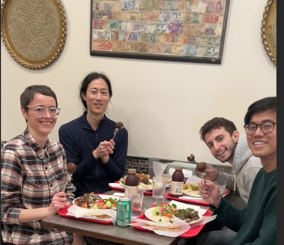

In [17]:
raw_image = Image.open('huggingface_friends.jpg')
raw_image.resize((284, 245))

In [18]:
from helper import summarize_predictions_natural_language

In [19]:
text = summarize_predictions_natural_language(pipeline_output)

In [20]:
text

'In this image, there are two forks three bottles two cups four persons one bowl and one dining table.'

### Generate Audio Narration of an Image

In [21]:
tts_pipe = pipeline("text-to-speech",
                    model="./models/kakao-enterprise/vits-ljs")

More info about [kakao-enterprise/vits-ljs](https://huggingface.co/kakao-enterprise/vits-ljs).

In [22]:
narrated_text = tts_pipe(text)

### Play the Generated Audio

In [23]:
from IPython.display import Audio as IPythonAudio

In [24]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])

### Try it yourself! 
- Try these models with other images!